# Neural Network Regression Model
predicting a number base on some other combination of variable.

In [167]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

print('tensorflow',tf.__version__)
print('numpy',np.__version__)
print('matplotlib',matplotlib.__version__)

tensorflow 2.8.0
numpy 1.22.3
matplotlib 3.4.3


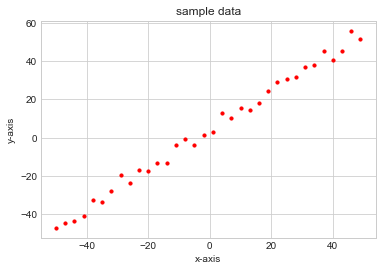

In [168]:
# create data and visualize
X = np.arange(-50,50,3)
y = X + 10 - (10 * np.random.rand(X.shape[0],))

plt.scatter(X,y,c='r',s=10)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('sample data');

### Input and Output shape
in this case we want to use 1 X to predict 1 y :<br>
input_shape = (1,1) and output_shape = (1,)<br>
input shape must be vector (1,1) and (1,) mean scalar.

In [169]:
X[0], y[0]

(-50, -47.52073623048776)

# Create a model

In [170]:
tf.random.set_seed(42)

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10,'leaky_relu'),
    tf.keras.layers.Dense(1,)

])
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
                metrics=['mae'])

model.fit(X.reshape(-1,1),y, epochs=1000, verbose=0);

In [171]:
error = model.evaluate(X.reshape(-1,1),y)
error

2/2 [==============================] - 0s 2ms/step - loss: 2.4512 - mae: 2.4512


[2.4512319564819336, 2.4512319564819336]

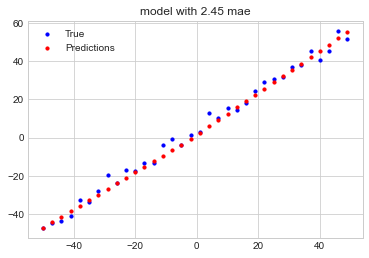

In [172]:
predictions = model.predict(X)

plt.scatter(X,y,c='b',s=10, label='True')
plt.scatter(X,predictions,c='r',s=10, label='Predictions')
plt.legend()
plt.title(f'model with {error[0]:.2f} mae')
plt.show();